# 🛠 Exercises

We've covered a lot quickly.

So now it's time to play around with a few things and build up your intuition.

I emphasize the words play around because that's very important. Try a few things, run the code, and see what happens.

## 0. Prerequisites

In [1]:
# load libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## 1. Create your regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [2]:
# Create a dataset using NumPy
X = np.random.randn(10000)
y = X + np.random.rand(10000)

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(8000, 8000, 2000, 2000)

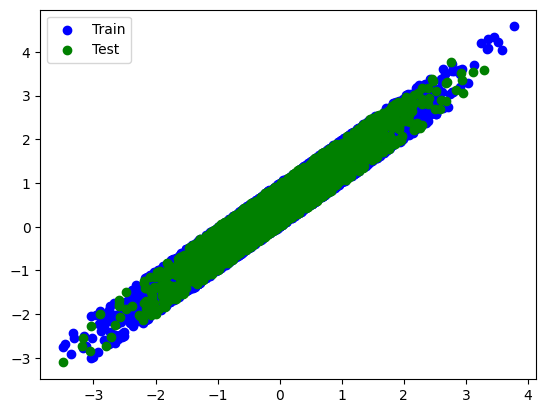

In [4]:
# Plot the dataset
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='g', label='Test')
plt.legend();

## 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [5]:
# Create a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=[1]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.msle,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [6]:
# See the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the model
history = model.fit(X, y, epochs=50)

Epoch 1/50
313/313 [==============================] - 3s 4ms/step - loss: 0.0218 - mae: 0.2847
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0181 - mae: 0.2542
Epoch 3/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0181 - mae: 0.2558
Epoch 4/50
313/313 [==============================] - 3s 11ms/step - loss: 0.0181 - mae: 0.2548
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0181 - mae: 0.2557
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0182 - mae: 0.2552
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 0.0181 - mae: 0.2548
Epoch 8/50
313/313 [==============================] - 3s 11ms/step - loss: 0.0182 - mae: 0.2553
Epoch 9/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0181 - mae: 0.2534
Epoch 10/50
313/313 [==============================] - 2s 7ms/step - loss: 0.0181 - mae: 0.2543
Epoch 11/50
313/313 [========================

In [8]:
# Predict using the model
y_preds = model.predict(X_test)
y_preds, y_preds.shape

63/63 [==============================] - 0s 2ms/step


(array([[ 1.1987709 ],
        [ 0.90467244],
        [ 1.6101007 ],
        ...,
        [ 0.26563722],
        [-0.25308982],
        [ 1.3993586 ]], dtype=float32),
 (2000, 1))

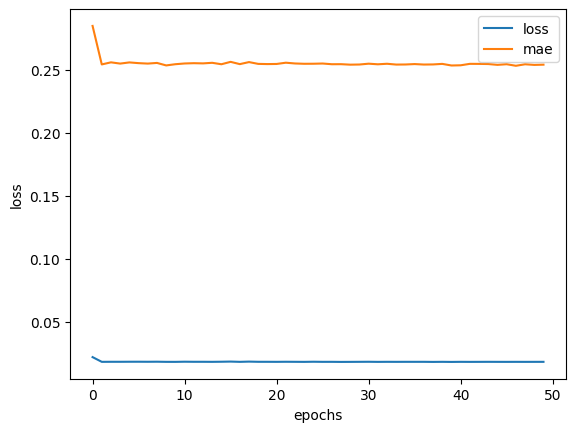

In [9]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

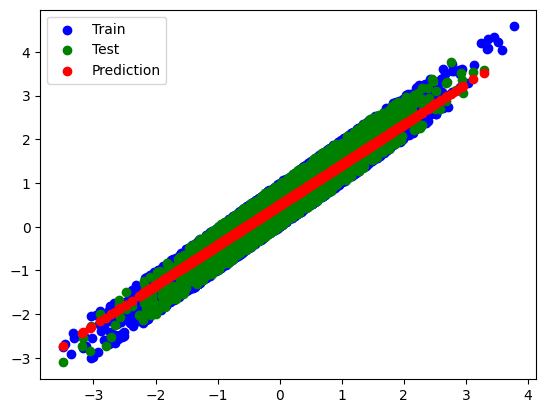

In [10]:
# Plot predictions
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='g', label='Test')
plt.scatter(X_test, y_preds, c='r', label='Prediction')
plt.legend();

## 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:

- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x.
- What happens if you train for longer (say 300 epochs instead of 200)?

In [11]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [12]:
# Check out the insurance dataset
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [14]:
X = insurance_one_hot.drop(columns=['charges'])
y = insurance_one_hot['charges']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

### 3.1 Increase layers

In [16]:
# Setup the model
tf.random.set_seed(42)

units = 16

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units, input_shape=[11]),
    tf.keras.layers.Dense(units * 2),
    tf.keras.layers.Dense(units * 4),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(optimizer='adam',
                        loss=tf.keras.losses.msle,
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=200, verbose=0)

In [17]:
# Evalute a model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1637 - mae: 3908.6121


[0.16369342803955078, 3908.612060546875]

### 3.2 Increase the number of units

In [18]:
# Setup the model
tf.random.set_seed(42)

units = 32

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units, input_shape=[11]),
    tf.keras.layers.Dense(units * 2),
    tf.keras.layers.Dense(units * 4),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(optimizer='adam',
                        loss=tf.keras.losses.msle,
                        metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [19]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.1499 - mae: 3650.9766


[0.14988119900226593, 3650.9765625]

### 3.3 Increase the first parameter of Adam optimizer (learning rate)

In [20]:
# Setup the model
tf.random.set_seed(42)

units = 16

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units, input_shape=[11]),
    tf.keras.layers.Dense(units * 2),
    tf.keras.layers.Dense(units * 4),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                        loss=tf.keras.losses.msle,
                        metrics=['mae'])

insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [21]:
# Evalute the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1481 - mae: 3554.1921


[0.14813676476478577, 3554.192138671875]

### 3.4 Increase the epoch

In [22]:
# Setup the model
tf.random.set_seed(42)

units = 16

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units, input_shape=[11]),
    tf.keras.layers.Dense(units * 2),
    tf.keras.layers.Dense(units * 4),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(optimizer='adam',
                        loss=tf.keras.losses.msle,
                        metrics=['mae'])

insurance_model_4.fit(X_train, y_train, epochs=300, verbose=0)

In [23]:
# Evaluate a model
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.1525 - mae: 3501.5757


[0.15250352025032043, 3501.57568359375]

## 4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

In [25]:
# Load the dataset
train, test = tf.keras.datasets.boston_housing.load_data()

X_train, y_train = train
X_test, y_test = test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

57026/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [26]:
# Setup a model
tf.random.set_seed(42)

units = 8

boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units, input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units * 2),
    tf.keras.layers.Dense(units * 4),
    tf.keras.layers.Dense(1)
])

boston_model.compile(optimizer='adam',
                     loss=tf.keras.losses.mse,
                     metrics=['mae'])

history = boston_model.fit(X_train, y_train, epochs = 300, verbose = 0)

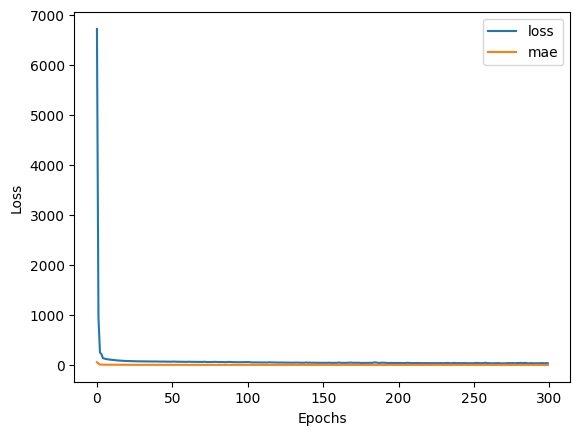

In [27]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs");

# 📖 Extra curriculum

If you're looking for extra materials relating to this notebook, I'd check out the following:

- [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
- Reading: 1 hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.

To practice your regression modeling with TensorFlow, I'd also encourage you to look through [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.